# **Import Modules**

## *python*

In [1]:
import os
import sys

## *custom*

In [2]:
# Import customised modules
# Define path
sys.path.append(os.path.abspath(os.path.join("..")))

# Import relevant modules
try:
    from scripts._02_bayesian_model import RegimeMixtureModel

    print("\nModule successfully imported.")

except ImportError:
    print("\nCould not import module from `scripts/`.")

PYTENSOR_FLAGS = optimizer=fast_compile,cxx=g++
PyTensor Optimizer = fast_compile
PyTensor CXX = g++

Module successfully imported.


# **Bayesian Model Setup**

In [3]:
# Load class input paths
# Specify directory
ntbk_dir = os.getcwd()  # Gets the directory of the notebook

log_price_path = os.path.join(
    ntbk_dir, "..", "data", "processed", "BrentOilPrices_Log.csv"
)
plot_dir = os.path.join(ntbk_dir, "..", "insights", "model")
processed_dir = os.path.join(ntbk_dir, "..", "data", "processed")

In [4]:
# Create model instance
model = RegimeMixtureModel(
    log_price_path=log_price_path, plot_dir=plot_dir, processed_dir=processed_dir
)

DataFrame loaded from ..\data\processed\BrentOilPrices_Log.csv
📄 Loaded 9011 rows of Brent oil data.
📅Date range: 1987-05-20 to 2022-11-14
📈 Columns available: ['Price', 'RollingMean', 'RollingStd', 'LogReturn']

RegimeMixtureModel class is initalised ...


🧪 Running full model pipeline...

🔍 Running PELT change point detection on raw price...

Plot saved to ..\insights\model\change_point_detection.png


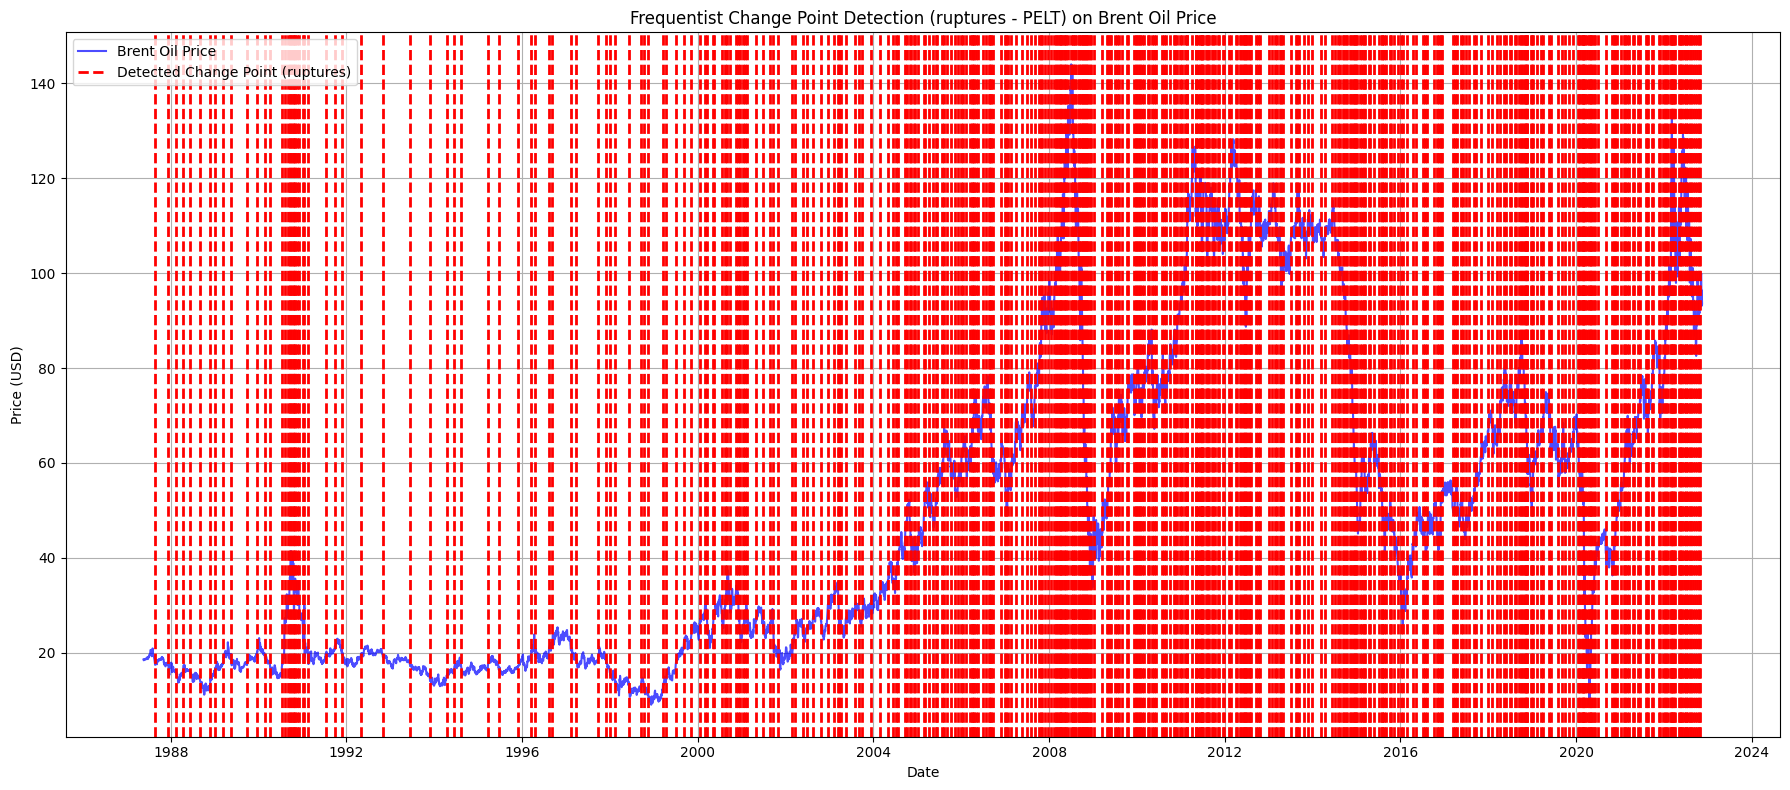

🔍 Performing Augmented Dickey-Fuller test on log returns...
📈 Number of log return observations: 9010
ADF Statistic: -16.4271
p-value: 0.0000
Log returns are likely stationary.

🚀 Starting PyMC sampling for volatility change point detection...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [tau_1]
>>Metropolis: [tau_2]
>NUTS: [sigma_1, sigma_2, sigma_3, mu_log_return]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



📊 Sampling complete. Summary:
💾 Summary saved to ..\data\processed\posterior_summary.csv


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_log_return,0.000,0.000,-0.000,0.001,0.000,0.000,12383.0,7024.0,1.00
sigma_1,0.024,0.000,0.023,0.024,0.000,0.000,12214.0,5980.0,1.00
sigma_2,0.019,0.000,0.019,0.020,0.000,0.000,12726.0,6882.0,1.00
sigma_3,0.049,0.001,0.046,0.051,0.000,0.000,11545.0,6126.0,1.00
tau_1,6012.550,17.734,6002.000,6043.000,1.327,3.011,411.0,257.0,1.01
tau_2,8322.242,5.143,8315.000,8328.000,0.336,0.157,236.0,635.0,1.01



📍 Most probable change point index: (6003, 8328)
📅 Most probable change point date: (Timestamp('2011-01-04 00:00:00'), Timestamp('2020-03-06 00:00:00'))

Plot saved to ..\insights\model\volatility_change_point_detection.png


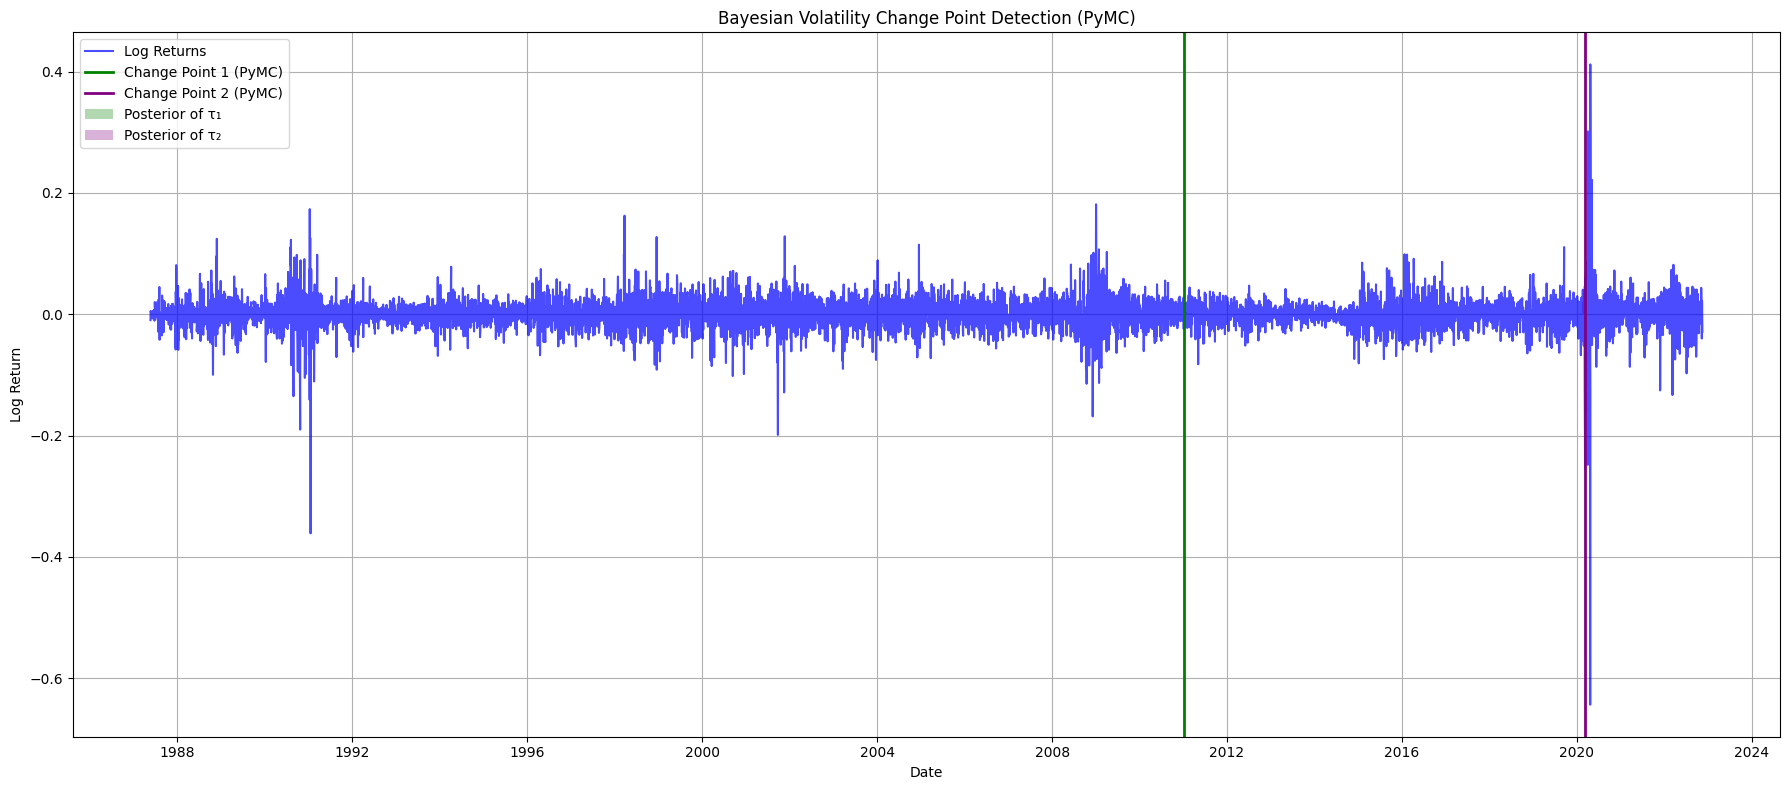


📊 Volatility by regime (standard deviation of log returns):
Regime 1 (before τ₁): 0.0238
Regime 2 (between τ₁ and τ₂): 0.0193
Regime 2 (after τ₂): 0.0486

💾 Volatility summary saved to ..\data\processed\volatility_by_regime.csv

💾 Trace saved to: ..\data\processed\model_trace.nc


In [5]:
# Run full Bayesian change point detection
model.run_model_and_infer()